In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive
from Code.UCBLearnerSlidingWindow import UCBLearnerSlidingWindow

%matplotlib inline

In [2]:
cust_json = "customer3_n_s.json"
today_customer = 300
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [=====================         ] 68.4%
loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
print(ucb6_learner.get_conv_rate_history())
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[1, 1, 1, 1, 1]
t:  2
phase 0
[0, 0, 0, 1, 0]
t:  3
phase 0
[2, 3, 2, 0, 2]
t:  4
phase 0
[2, 1, 1, 1, 1]
t:  5
phase 0
[2, 3, 2, 1, 0]
t:  6
phase 0
[2, 2, 1, 1, 2]
t:  7
phase 0
[3, 1, 3, 3, 2]
t:  8
phase 0
[2, 3, 1, 1, 2]
t:  9
phase 0
loading: [=                             ] 3.3%
[2, 3, 2, 0, 3]
t:  10
phase 0
[2, 1, 2, 1, 1]
t:  11
phase 0
[2, 3, 1,

[2, 1, 1, 0, 2]
t:  197
phase 1
[2, 2, 1, 0, 2]
t:  198
phase 1
[2, 0, 1, 1, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 1, 3, 1, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.01 0.53 0.08]
 [0.01 0.5  0.02 0.  ]
 [0.   0.   0.1  0.62]
 [0.04 0.8  0.04 0.  ]
 [0.   0.07 0.5  0.07]]
conv_rate: [[0.   0.   0.03 0.6 ]
 [0.   0.   0.03 0.36]
 [0.   0.24 0.13 0.  ]
 [0.24 0.05 0.   0.  ]
 [0.49 0.16 0.   0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
[2, 1, 3, 1, 2]
t:  201
phase 2
[2, 1, 3, 1, 2]
t:  202
phase 2
[2, 1, 3, 1, 2]
t:  203
phase 2
[2, 1, 3, 1, 2]
t:  204
phase 2
[2, 1, 3, 1, 2]
t:  205
phase 2
[2, 1, 3, 1, 2]
t:  206
phase 2
[2, 1, 3, 1, 2]
t:  207
phase 2
[2, 1, 3, 1, 2]
t:  208
phase 2
[2, 1, 3, 1, 1]
t:  209
phase 2
loading: [=====

[2, 2, 2, 1, 2]
t:  94
phase 0
[2, 1, 1, 1, 2]
t:  95
phase 0
[2, 1, 1, 1, 2]
t:  96
phase 0
[2, 1, 1, 1, 2]
t:  97
phase 0
[2, 1, 1, 1, 2]
t:  98
phase 0
[2, 1, 1, 1, 2]
t:  99
phase 0
loading: [==========                    ] 33.3%
[2, 1, 1, 1, 2]
t:  100
phase 1
set customer
conv_rate: [[0.   0.   0.24 0.13]
 [0.18 0.   0.   0.  ]
 [0.   0.   0.16 0.3 ]
 [0.4  0.02 0.   0.  ]
 [0.   0.08 0.28 0.02]]
conv_rate: [[0.   0.02 0.4  0.02]
 [0.   0.01 0.44 0.01]
 [0.01 0.2  0.01 0.  ]
 [0.3  0.5  0.3  0.07]
 [0.   0.02 0.35 0.35]]
conv_rate: [[0.   0.3  0.16 0.  ]
 [0.   0.24 0.13 0.  ]
 [0.   0.13 0.24 0.  ]
 [0.18 0.1  0.   0.  ]
 [0.   0.   0.44 0.  ]]
conv_rate: [[0.   0.3  0.16 0.  ]
 [0.   0.24 0.13 0.  ]
 [0.   0.13 0.24 0.  ]
 [0.18 0.1  0.   0.  ]
 [0.   0.   0.44 0.  ]]
[2, 1, 2, 2, 2]
t:  101
phase 1
[2, 1, 1, 1, 2]
t:  102
phase 1
[2, 1, 1, 1, 2]
t:  103
phase 1
[2, 3, 1, 3, 2]
t:  104
phase 1
[2, 1, 1, 1, 2]
t:  105
phase 1
[2, 1, 1, 1, 2]
t:  106
phase 1
[2, 1, 1, 1, 2]
t:  1

[2, 1, 3, 1, 2]
t:  289
phase 2
loading: [============================= ] 96.7%
[2, 1, 3, 1, 2]
t:  290
phase 2
[2, 1, 3, 1, 2]
t:  291
phase 2
[2, 1, 3, 2, 2]
t:  292
phase 2
[2, 1, 3, 1, 2]
t:  293
phase 2
[2, 1, 3, 1, 2]
t:  294
phase 2
[2, 1, 3, 1, 2]
t:  295
phase 2
[2, 3, 3, 1, 2]
t:  296
phase 2
[2, 1, 3, 1, 2]
t:  297
phase 2
[2, 1, 3, 1, 2]
t:  298
phase 2
[2, 1, 3, 1, 2]
t:  299
phase 2
Iteration # 3
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 

[2, 2, 1, 1, 2]
t:  186
phase 1
[2, 0, 3, 1, 2]
t:  187
phase 1
[2, 2, 1, 1, 2]
t:  188
phase 1
[2, 2, 2, 0, 2]
t:  189
phase 1
loading: [===================           ] 63.3%
[2, 2, 1, 1, 2]
t:  190
phase 1
[2, 2, 1, 1, 2]
t:  191
phase 1
[2, 1, 0, 1, 2]
t:  192
phase 1
[2, 2, 1, 1, 2]
t:  193
phase 1
[2, 2, 1, 1, 2]
t:  194
phase 1
[2, 2, 3, 1, 2]
t:  195
phase 1
[3, 2, 1, 1, 2]
t:  196
phase 1
[2, 2, 1, 0, 2]
t:  197
phase 1
[2, 2, 2, 1, 2]
t:  198
phase 1
[2, 1, 1, 1, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 2, 1, 1, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.01 0.53 0.08]
 [0.01 0.5  0.02 0.  ]
 [0.   0.   0.1  0.62]
 [0.04 0.8  0.04 0.  ]
 [0.   0.07 0.5  0.07]]
conv_rate: [[0.   0.   0.03 0.6 ]
 [0.   0.   0.03 0.36]
 [0.   0.24 0.13 0.  ]
 [0.24 0.05 0.   0.  ]
 [0.49 0.16 0.   0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
conv_rate: [[0.   0.09 0.62 0.

(3, 300)

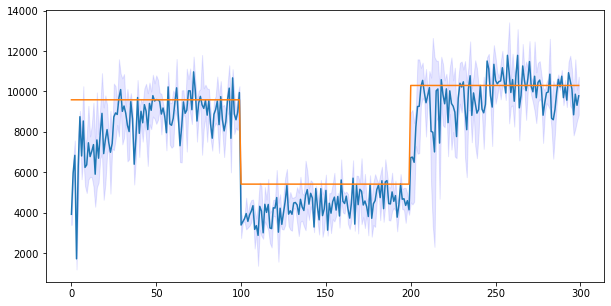

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)


plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

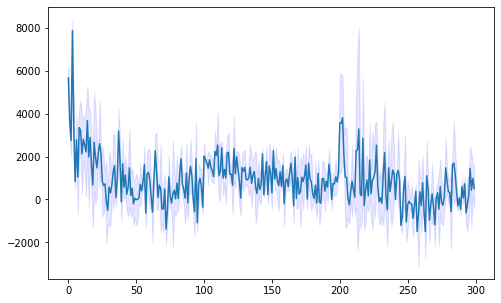

In [7]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

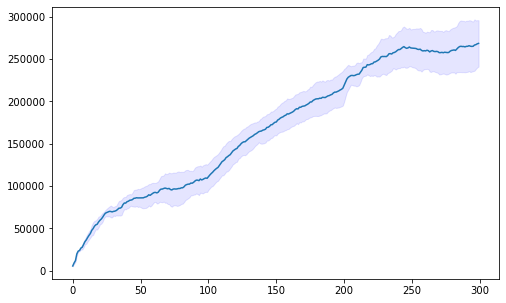

In [8]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

In [9]:
n_products

5

In [10]:
n_arms

4

In [11]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [12]:
array

array([[0.5, 0.7, 0.7, 0.8],
       [0.2, 0.6, 0.3, 0.4],
       [0.4, 0.4, 0.3, 0.3],
       [0.7, 0.9, 0.9, 0.4],
       [0.8, 0.8, 0.6, 0.8]])

In [13]:
randrange(0,1)

0

In [14]:
cust_json = "customer3_n_s.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [====================          ] 66.4%
loading: [=====================         ] 67.4%
loading: [=====================         ] 68.4%
loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    

In [15]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))

In [16]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerSlidingWindow(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, window_size=40)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[1, 1, 1, 1, 1]
t:  2
phase 0
[0, 1, 2, 3, 2]
t:  3
phase 0
[2, 0, 0, 1, 0]
t:  4
phase 0
[2, 3, 1, 2, 2]
t:  5
phase 0
[2, 1, 2, 0, 3]
t:  6
phase 0
[3, 2, 3, 1, 1]
t:  7
phase 0
[2, 0, 1, 0, 2]
t:  8
phase 0
[2, 1, 0, 0, 2]
t:  9
phase 0
loading: [=                             ] 3.3%
[1, 1, 1, 0, 0]
t:  10
phase 0
[3, 3, 1, 3, 3]
t:  11
phase 0
[2, 1, 2,

[2, 2, 1, 1, 2]
t:  197
phase 1
[3, 2, 1, 0, 2]
t:  198
phase 1
[2, 2, 3, 2, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 2, 3, 2, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.01 0.53 0.08]
 [0.01 0.5  0.02 0.  ]
 [0.   0.   0.1  0.62]
 [0.04 0.8  0.04 0.  ]
 [0.   0.07 0.5  0.07]]
conv_rate: [[0.   0.   0.03 0.6 ]
 [0.   0.   0.03 0.36]
 [0.   0.24 0.13 0.  ]
 [0.24 0.05 0.   0.  ]
 [0.49 0.16 0.   0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
[2, 1, 3, 1, 2]
t:  201
phase 2
[2, 1, 3, 1, 3]
t:  202
phase 2
[2, 1, 0, 1, 2]
t:  203
phase 2
[2, 1, 3, 1, 2]
t:  204
phase 2
[2, 1, 3, 1, 2]
t:  205
phase 2
[2, 1, 3, 1, 2]
t:  206
phase 2
[2, 1, 3, 1, 2]
t:  207
phase 2
[0, 1, 3, 1, 1]
t:  208
phase 2
[2, 1, 3, 1, 2]
t:  209
phase 2
loading: [=====

[3, 1, 1, 1, 2]
t:  94
phase 0
[3, 1, 1, 3, 1]
t:  95
phase 0
[2, 3, 1, 1, 2]
t:  96
phase 0
[2, 3, 1, 1, 2]
t:  97
phase 0
[2, 2, 3, 1, 3]
t:  98
phase 0
[2, 1, 1, 1, 2]
t:  99
phase 0
loading: [==========                    ] 33.3%
[2, 1, 1, 2, 2]
t:  100
phase 1
set customer
conv_rate: [[0.   0.   0.24 0.13]
 [0.18 0.   0.   0.  ]
 [0.   0.   0.16 0.3 ]
 [0.4  0.02 0.   0.  ]
 [0.   0.08 0.28 0.02]]
conv_rate: [[0.   0.02 0.4  0.02]
 [0.   0.01 0.44 0.01]
 [0.01 0.2  0.01 0.  ]
 [0.3  0.5  0.3  0.07]
 [0.   0.02 0.35 0.35]]
conv_rate: [[0.   0.3  0.16 0.  ]
 [0.   0.24 0.13 0.  ]
 [0.   0.13 0.24 0.  ]
 [0.18 0.1  0.   0.  ]
 [0.   0.   0.44 0.  ]]
conv_rate: [[0.   0.3  0.16 0.  ]
 [0.   0.24 0.13 0.  ]
 [0.   0.13 0.24 0.  ]
 [0.18 0.1  0.   0.  ]
 [0.   0.   0.44 0.  ]]
[2, 3, 2, 2, 2]
t:  101
phase 1
[2, 2, 2, 0, 2]
t:  102
phase 1
[2, 2, 1, 1, 0]
t:  103
phase 1
[2, 1, 3, 1, 2]
t:  104
phase 1
[2, 3, 1, 2, 0]
t:  105
phase 1
[2, 1, 1, 3, 2]
t:  106
phase 1
[2, 2, 1, 3, 2]
t:  1

[2, 1, 2, 1, 3]
t:  290
phase 2
[1, 1, 1, 1, 2]
t:  291
phase 2
[2, 1, 2, 1, 2]
t:  292
phase 2
[2, 1, 3, 1, 2]
t:  293
phase 2
[2, 1, 3, 0, 2]
t:  294
phase 2
[2, 1, 0, 3, 2]
t:  295
phase 2
[2, 1, 3, 3, 1]
t:  296
phase 2
[2, 1, 3, 1, 2]
t:  297
phase 2
[2, 1, 3, 1, 2]
t:  298
phase 2
[2, 2, 3, 0, 2]
t:  299
phase 2
Iteration # 3
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
t:  0
phase 0
set customer
conv_rate: [[0.   0.04 0.8  0.04]
 [0.   0.49 0.26 0.  ]
 [0.03 0.6  0.03 0.  ]
 [0.04 0.8  0.04 0.  ]
 [0.01 0.36 0.36 0.01]]
conv_rate: [[0.   0.   0.02 0.5 ]
 [0.   0.   0.   0.7 ]
 [0.   0.04 0.8  0.03]
 [0.5  0.02 0.   0.  ]
 [0.5  0.   0.   0.  ]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
conv_rate: [[0.02 0.5  0.02 0.  ]
 [0.16 0.16 0.   0.  ]
 [0.   0.   0.02 0.5 ]
 [0.18 0.04 0.   0.  ]
 [0.   0.17 0.7  0.17]]
[2, 2, 2, 2, 2]
t:  1
phase 0
[2, 1, 1, 1, 2]
t:  2
phase 0
[1, 0, 1

[0, 1, 1, 0, 2]
t:  189
phase 1
loading: [===================           ] 63.3%
[1, 1, 1, 0, 2]
t:  190
phase 1
[2, 0, 1, 0, 2]
t:  191
phase 1
[2, 2, 2, 0, 2]
t:  192
phase 1
[2, 0, 0, 3, 2]
t:  193
phase 1
[2, 0, 3, 1, 3]
t:  194
phase 1
[2, 0, 2, 1, 2]
t:  195
phase 1
[2, 1, 1, 1, 1]
t:  196
phase 1
[2, 2, 3, 3, 2]
t:  197
phase 1
[2, 2, 0, 0, 2]
t:  198
phase 1
[2, 3, 2, 1, 2]
t:  199
phase 1
loading: [====================          ] 66.7%
[2, 2, 2, 2, 2]
t:  200
phase 2
set customer
conv_rate: [[0.   0.01 0.53 0.08]
 [0.01 0.5  0.02 0.  ]
 [0.   0.   0.1  0.62]
 [0.04 0.8  0.04 0.  ]
 [0.   0.07 0.5  0.07]]
conv_rate: [[0.   0.   0.03 0.6 ]
 [0.   0.   0.03 0.36]
 [0.   0.24 0.13 0.  ]
 [0.24 0.05 0.   0.  ]
 [0.49 0.16 0.   0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]
conv_rate: [[0.   0.09 0.62 0.01]
 [0.   0.43 0.23 0.  ]
 [0.   0.01 0.44 0.07]
 [0.44 0.07 0.   0.  ]
 [0.   0.01 0.08 0.  ]]

(3, 300)

In [17]:
ucb6_learner.reports

[(array([37, 31, 26, 13, 20]), array([15,  7,  9,  3,  5]), [2, 1, 3, 1, 0]),
 (array([25, 33, 31, 11, 21]), array([12, 10, 10,  7,  5]), [2, 1, 3, 1, 2]),
 (array([46, 33, 23, 12, 16]), array([17, 11, 12,  5,  4]), [2, 1, 3, 1, 2]),
 (array([28, 35, 25, 11, 17]), array([15, 13,  0,  5,  0]), [2, 1, 0, 1, 3]),
 (array([41, 30, 24,  8, 21]), array([19,  5,  8,  2,  7]), [2, 2, 3, 1, 2]),
 (array([29, 30, 22, 16, 28]), array([15,  1,  7,  8, 12]), [2, 2, 3, 1, 2]),
 (array([36, 26, 16, 11, 27]), array([15,  1,  4,  4,  4]), [2, 3, 3, 1, 2]),
 (array([35, 30, 21, 11, 22]), array([7, 2, 8, 4, 0]), [3, 2, 3, 1, 3]),
 (array([36, 24, 26, 14, 23]), array([11,  8,  8,  0,  4]), [2, 1, 3, 3, 2]),
 (array([21, 30, 27, 14, 24]), array([ 5,  8, 10,  5,  0]), [3, 1, 3, 1, 3]),
 (array([32, 32, 23, 12, 23]), array([10,  1,  7,  2,  7]), [3, 3, 3, 0, 2]),
 (array([49, 30, 17, 11, 21]), array([8, 7, 5, 3, 7]), [3, 3, 3, 0, 2]),
 (array([35, 26, 20, 11, 19]), array([0, 4, 0, 3, 8]), [1, 3, 1, 1, 2]),
 

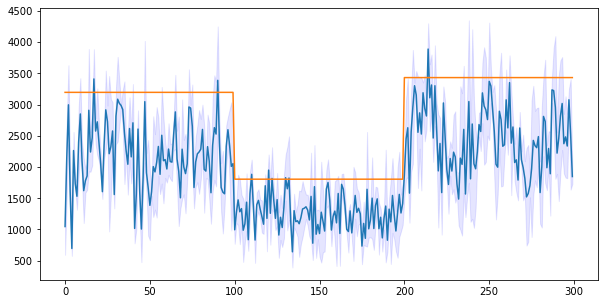

In [18]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

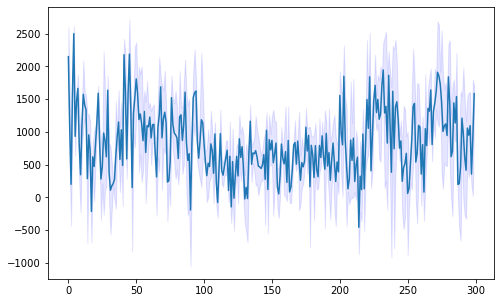

In [19]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)
plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

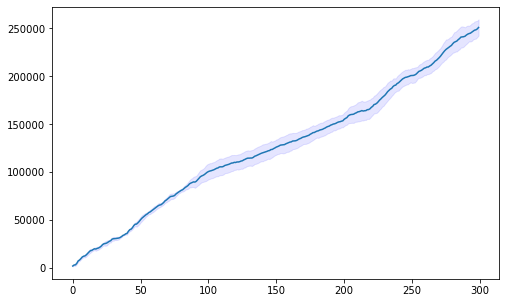

In [20]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

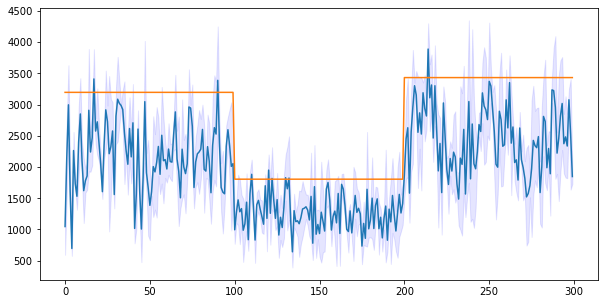

In [21]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c)
plt.show()

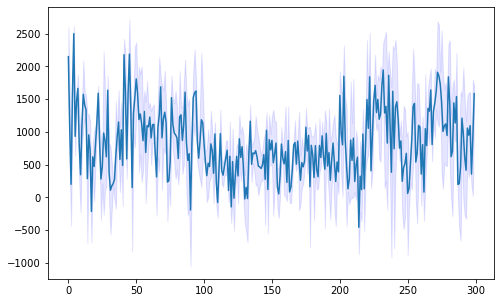

In [22]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

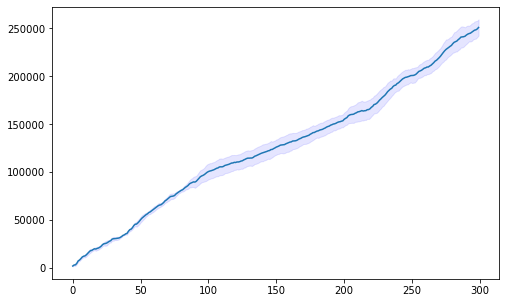

In [23]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

In [24]:
#plt.savefig('foo.pdf')